# 나만의 딥러닝 기반 추천 시스템 구축하기

## 들어가며

지금까지 여러분은 딥러닝 기반 추천 시스템이 나타나게 된 배경과 개요, 다양한 딥러닝 기반 추천 시스템의 특징, 추천 시스템을 설계할 때 고려해야 할 사항, 논문과 코드로 살펴본 대표적인 딥러닝 기반 추천 시스템 모델을 살펴보았습니다.

하지만 추천 시스템 분야의 머신러닝 개발자, 데이터 사이언티스트는 지속적으로 새로운 모델을 공부하는 것 외에도 습득한 내용을 토대로 모델을 개발하고 시스템을 구축하는 작업도 수행해야 합니다.

여러분도 지금까지 딥러닝 기반 추천 시스템에 대해 다양하게 공부했으니 실제로 모델을 개발해 봐야겠죠?

이번 노드에서는 영화 데이터 MovieLens 1M과 대표적인 딥러닝 기반 추천 시스템 모델인 AutoInt를 사용하여 영화 추천 시스템을 만들어 보겠습니다.

### 프로젝트 소개
___
'나만의 딥러닝 기반 추천 시스템 구축하기'는 AutoInt 모델을 직접 구현해보고 최종적으로 스트림릿(Streamlit)을 활용해 시각화하는 과정을 담고 있습니다.

이러한 과정은 실무에서도 많이 사용되고 있습니다. 스트림릿을 사용하여 시각화를 하는 이유는 '추천 시스템 결과가 어떻게 나오는지'를 시각적으로 살펴 보면서 관련 실무자들과 소통하기 위해서입니다.

우리가 아무리 좋은 모델을 만들어도 모델의 높은 정확도나 랭킹 지표만으로 다른 분야의 개발자, 관련 실무자, AI를 모르시는 분들을 설득하는 것은 쉽지 않습니다. 그 분들에게는 모델의 정확도나 랭킹 지표가 높게 나오는 것이 아니라, '실제 결과가 어떻게 나오느냐'가 더 중요하기 때문이죠.

그래서 그 분들은 PoC(Proof of Concept) 형태로 결과를 확인하는 것을 더 선호합니다. 따라서 머신러닝 개발자나 데이터 사이언티스트는 모델을 만들고 그 모델의 결과를 기반으로 웹에 결과를 간단하게 시각화하여 관련 실무자들과 소통합니다.

>🔅 POC란?
>
>개념 증명 또는 개념 실증이라고 불리는 POC(Proof of Concept)는 >기존 시장에 없었던 신기술을 도입하기 전에 이를 검증하기 위해 >사용하는 과정을 의미합니다.

최종적으로 나와야 하는 프로젝트 결과물은 아래와 같습니다.

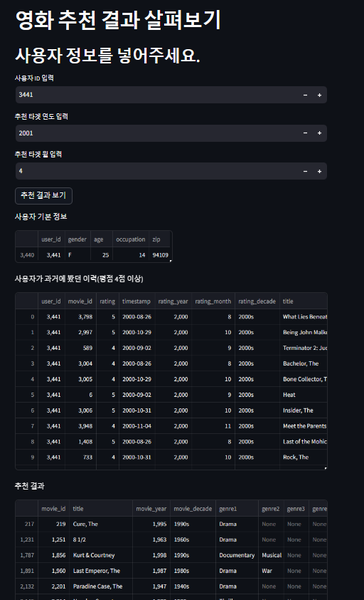

이미지가 작아서 잘 보이지 않죠? 각 부분을 확대하여 살펴 보겠습니다.

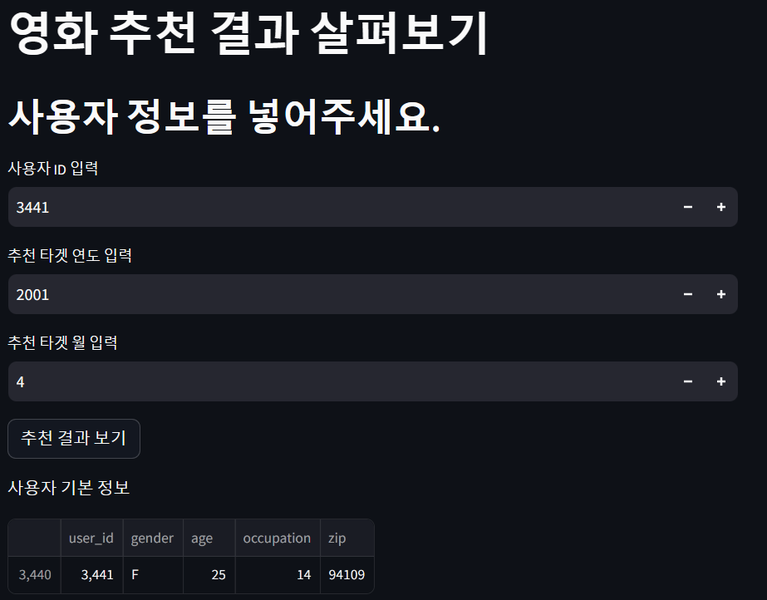

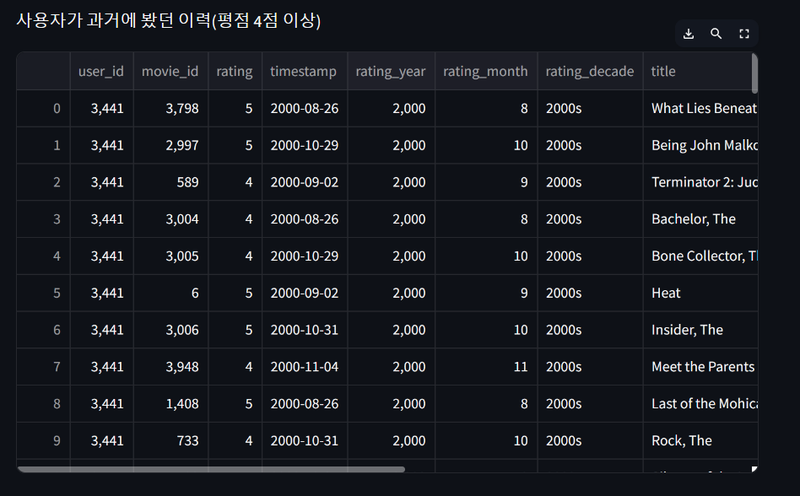

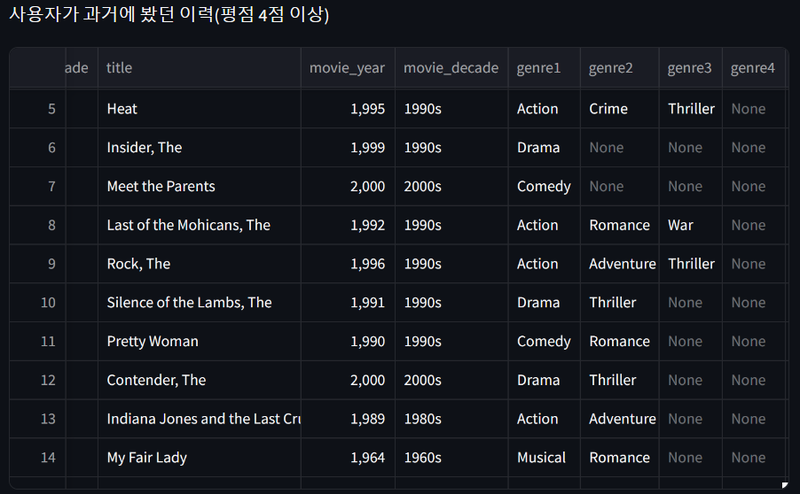

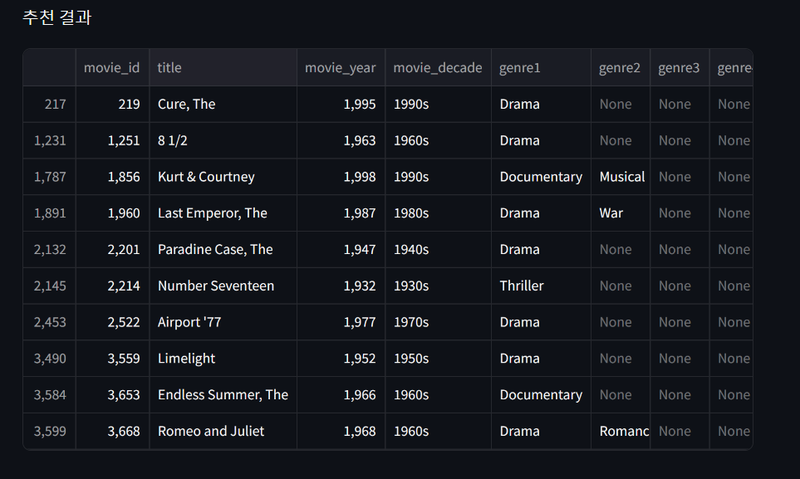

### 프로젝트 순서
___
'나만의 딥러닝 기반 추천 시스템 구축하기'는 아래와 같은 순서로 진행됩니다.

>1. 데이터 분석
>
>2. 데이터 전처리
>
>3. AutoInt 모델 구현 및 학습
>
>4. 스트림릿을 통한 시각화
>
>5. 프로젝트: AutoInt+ 모델 구현 및 시각화

1~4번까지는 텍스트, 코드, 주석 등을 통해 학습이 진행되고, 5번에서는 AutoInt+ 모델 구조 이미지와 파이토치 코드를 토대로 여러분이 직접 AutoInt+ 모델을 구현 및 학습시킨 후 스트림릿으로 시각화까지 진행하셔야 합니다.

이미 '추천 시스템, 모델 톺아보기: 논문과 코드'에서 AutoInt 모델과 AutoInt+ 모델의 구조와 코드를 학습했기 때문에 텍스트, 코드, 주석만으로도 학습이 충분히 가능하실 것으로 생각됩니다. 이전에 배웠던 AutoInt 모델이 잘 기억나지 않는다면 배웠던 내용을 한번 더 복습하고 오시길 바랍니다. 🙏

이제 데이터 분석부터 시작해 볼까요? 💪💪

## 데이터 분석하기

### 데이터 불러오기
___
실습에서 사용할 데이터는 MovieLens1M라는 데이터 셋입니다.
MovieLens1m 데이터 셋은 grouplens에서 받을 수 있습니다.
연구 및 실습용으로만 사용할 수 있고 재배포하거나 상업적으로는 사용할 수 없다는 점, 참고해주세요!

데이터 및 라이선스에 대한 자세한 설명은 READMe.txt에서 확인하실 수 있습니다.



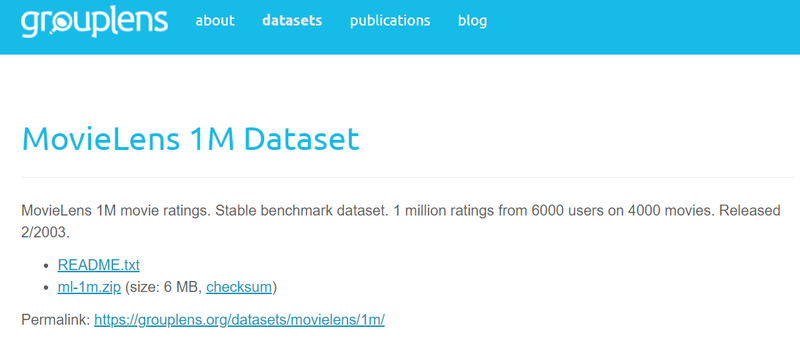

데이터 다운로드
먼저 실습 환경에 MovieLens1M 데이터를 받아봅시다. grouplens서 제공해주는 다운로드 링크를 사용하면 바로 다운로드받을 수 있습니다.

In [1]:
!mkdir -p ./autoint && wget -O ./autoint/ml-1m.zip https://files.grouplens.org/datasets/movielens/ml-1m.zip

���� ������ �ùٸ��� �ʽ��ϴ�.


데이터가 성공적으로 다운로드되었습니다. 데이터가 실제로 잘 받아졌는지 확인해 볼까요?






In [2]:
#!ls ./autoint

압축되어 있는 파일을 풀어줘야 실제로 데이터를 우리가 사용할 수 있겠죠? 아래의 명령어를 통해 파일 압축을 풀어줍시다.






In [3]:
#!unzip ./autoint/ml-1m.zip -d ./autoint

압축 파일을 풀어주는 과정은 5분 정도 소요됩니다.

데이터를 다운로드하고 압축 파일을 풀어주는 작업은 처음 1번만 해도 됩니다.

### 데이터 살펴보기
___
자, 이렇게 데이터 압축이 풀렸습니다. 그럼 MovieLens1M 데이터를 간단하게 살펴볼까요?

그 전에 먼저 데이터 분석에 앞서서 분석을 위한 환경을 먼저 갖춰야합니다.

데이터 분석을 위해 plotly 라이브러리 하나를 설치해 줍시다.
시각화를 위한 라이브러리인데요. matplotlib이나 seaborn 등과 마찬가지로 많이 사용하는 라이브러리입니다.
시각적 요소가 잘 보이는 것도 장점이지만, 상호작용(interacting)되는 것이 큰 장점입니다.

>plotly 라이브러리를 사용한 시각화 결과는 LMS에서는 나타나지 않을 수 있습니다. plotly 라이브러리를 사용하는 코드는 여러분의 컴퓨터(로컬 환경)에서나 클라우드 주피터 노트북에서 실행해보고, seaborn 코드와 결과를 비교해 보세요! 🙏

In [4]:
# plotly 라이브러리 설치

!pip install plotly

필요한 라이브러리들을 불러오고(import) 데이터 로드(load)를 위한 세팅 작업을 한 후에 데이터를 불러옵시다.






In [5]:
# 라이브러리 호출
import re
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

plt.rc('font', family='NanumMyeongjo')

MovieLens1M 데이터는 .dat이라는 형식으로 제공되고 있습니다. 컬럼 정보가 지정되어 있지 않기 때문에 먼저 각 데이터마다 컬럼 정보를 세팅해 주어야 합니다.

각 컬럼 정보는 MovieLens1M README.txt에 잘 나와있습니다.

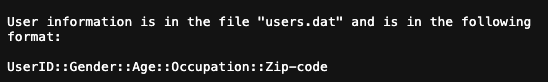

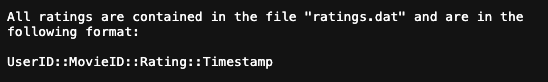

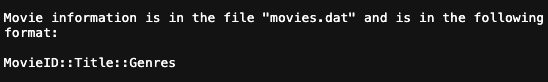

데이터를 불러옵시다. README.txt에 나와있는 컬럼 정보를 지정해 줍니다.






In [6]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

우리 데이터는 `./autoint/ml-1m` 경로에 저장되어 있습니다. 위에서 데이터를 다운로드했던 경로에요!
경로를 먼저 설정해주고 데이터를 불러옵니다. pandas의 `read_csv`를 활용하면 됩니다.

In [7]:
data_path = './autoint/ml-1m'

# 데이터를 불러옵니다.
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

그럼, 이제 로드된 데이터를 하나하나 간단하게 살펴보겠습니다.



**1. user 정보**

사용자 정보는 user_id, gender, age, occupation, zip 정보로 구성되어 있습니다.

- user_id: 1부터 6040으로, 익명의 정보로 되어 있음
- gender: M or F
- age: 18세 이하는 1, 18 ~ 24세는 18, 25 ~ 34는 25 등과 같이 구성되어 있음
- occupation: 2는 artist, 8은 farmer 등으로 숫자값으로 매핑되어 있음

위와 같이 데이터가 저장되어 있습니다.

In [8]:
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


**2.rating 정보**

사용자의 평점이 담겨 있는 데이터입니다. 아래와 같이 데이터가 저장되어 있습니다.

user_id, movie_id, rating, timestamp 컬럼으로 데이터 저장
- user_id: 1부터 6040으로, 익명의 정보로 되어 있음
- movie_id: 1부터 3952로, 익명의 정보로 되어 있음
- rating: 5점 평점
- timestamp: Unix timestamp로 되어 있음.

>Unix timestamp란
>
>1970년 1월 1일 00:00:00 UTC 이후 경과한 '초' 수를 말합니다. 우리가 흔히 알고 있는 연-월-일로 변환이 필요합니다.

In [9]:
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


**3.movie 정보**

영화 정보가 담겨져 있는 데이터입니다. 아래와 같이 데이터가 저장되어 있습니다.

movie_id, title, genres 컬럼으로 데이터 저장

- movie_id : 1부터 3952로, 익명의 정보로 되어 있음
- title: 영화 제목과 연도가 함께 입력되어 있음
- genres: Action, Comedy 등의 장르가 입력되어 있음

In [10]:
print(movies.shape)
movies.head() # 마지막 MovieID를 확인하려면 head() 대신 tail()로 확인해 보세요.

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 데이터 분석
___
추천 시스템을 구축하기에 앞서 다음과 같이 데이터를 간단하게 살펴보고자 합니다.

사전에 데이터를 이해하는 것은 매우 중요한데요, 그 이유는 데이터를 파악하지 않고 모델을 구축하면 원하는 문제가 해결되지 않기 때문입니다. 따라서 데이터가 바라는 방향(분류인지, 점수 예측인지 등), 특징(편향이 되어 있는지 등)등을 파악하고 모델을 구성해야 합니다.

여기서 간단하게 보고자 하는 데이터 분석 항목은 다음과 같습니다.

1. 장르별 영화 수
2. **연도별** 영화 수
3. 평점 분포
4. 장르별 평점

In [11]:
# !sudo apt-get install -y fonts-nanum*
# !sudo fc-cache -fv

설치된 나눔고딕 폰트 파일의 경로를 찾아서 Matplotlib의 폰트 관리자에 직접 등록합니다.

In [12]:
import matplotlib.font_manager as fm
import os

# 나눔고딕 폰트 파일 경로 찾기
# Colab 환경에서 폰트가 설치되는 일반적인 경로를 확인합니다.
# `find` 명령어를 사용하여 정확한 경로를 찾습니다.
font_path = None
try:
    # `find` 명령어를 실행하고 결과를 파싱합니다.
    find_output = os.popen('find / -name "NanumGothicBold.ttf" 2>/dev/null').read().strip()
    if find_output:
        # 첫 번째 찾은 경로를 사용합니다.
        font_path = find_output.split('\n')[0]
        print(f"나눔고딕 폰트 파일 경로를 찾았습니다: {font_path}")
    else:
        print("나눔고딕 폰트 파일을 찾지 못했습니다.")
except Exception as e:
    print(f"폰트 경로를 찾는 중 오류 발생: {e}")
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf' # 일반적인 경로 시도

if font_path and os.path.exists(font_path):
    # Matplotlib 폰트 관리자에 폰트 등록
    try:
        font_entry = fm.FontEntry(fname=font_path, name='NanumGothic')
        fm.fontManager.ttflist.insert(0, font_entry) # 목록 맨 앞에 삽입하여 우선순위 높이기
        plt.rcParams['font.family'] = 'NanumGothic'
        plt.rcParams['axes.unicode_minus'] = False
        print("Matplotlib 폰트 설정을 나눔고딕으로 변경했습니다.")
        print("Matplotlib 폰트 캐시를 다시 로드합니다.")
        fm.fontManager.addfont(font_path) # Add the font to the font manager
        plt.close('all') # Close existing plot figures to apply font changes
    except Exception as e:
        print(f"Matplotlib 폰트 설정 중 오류 발생: {e}")
else:
    print("유효한 나눔고딕 폰트 파일 경로를 찾지 못했습니다. 폰트 설치를 다시 확인해주세요.")

나눔고딕 폰트 파일 경로를 찾았습니다: /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
Matplotlib 폰트 설정을 나눔고딕으로 변경했습니다.
Matplotlib 폰트 캐시를 다시 로드합니다.


**1.영화 데이터(movies)**

영화 데이터에는 영화 ID(movie_id), 영화 제목(title), 장르(genres)의 정보만 포함되어 있습니다. 하지만 이 데이터의 정보를 분리해서 연도별 분석, 장르별 분석이 가능하게 할 수 있습니다.

가장 먼저, 영화의 제목과 연도를 분리해 봅시다.

영화 제목을 보면 'Toy Story (1995)'와 같이 영화 제목과 연도가 같이 입력되어 있는데요. 영화 제목에서 연도만 뽑아내면 연도와 영화 제목으로 나눌 수 있겠죠?

정규표현식을 이용해서 영화 제목에서 연도를 뽑아냅시다.

In [13]:
# 이 정규표현식은 '괄호 안에 있는 숫자4개만 뽑아주세요.'라는 의미입니다.
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [14]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


장르를 분리할 수도 있습니다.

현재 genres 컬럼은 `Animation|Children's|Comedy`처럼 `|`를 기준으로 여러 개의 장르가 한 데이터에 모두 들어가 있는 상태입니다. 즉 |를 기준으로 각 장르를 분리할 수 있다는 거죠!

이때 `.split` 함수를 이용합니다. 문자열에 split을 적용하게 되면 split(기준)으로 데이터가 나뉘어 리스트로 변환되는데요, 이를 dataframe의 explode 함수를 적용하면 쫙 펼칠 수 있습니다.

In [15]:
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


이제 데이터를 간단히 분석해볼까요?



⭐ 장르별 영화 개수

히스토그램을 그려보겠습니다. 히스토그램을 그릴 때 x축은 genres_split으로 기준을 잡으면 해당 장르별 영화 개수 분포를 그릴 수 있습니다.

- x축: 장르
- y축: 개수

In [16]:
# plotly 버전(로컬 환경 또는 클라우드 노트북 환경에서 실행시켜 주세요!)
px.histogram(movies_exploded,
             x='genres_split', height=450, title='장르별 영화 수').update_xaxes(categoryorder="total descending")

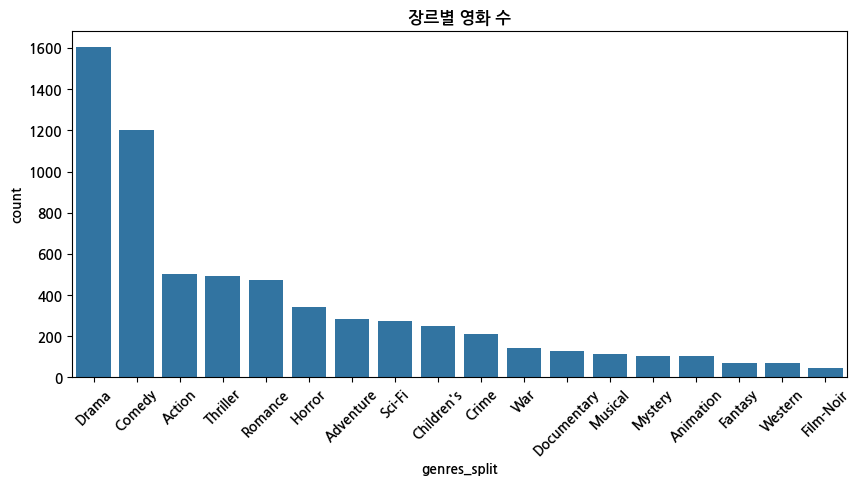

In [17]:
# seaborn 버전
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('장르별 영화 수')
plt.xticks(rotation=45)

plt.show()

⭐ 연도별 영화 개수

연도별 영화 수를 살펴보겠습니다.

- x축: 연도
- y축: 영화의 개수

In [18]:
# plotly 버전
px.histogram(movies,
             x='year', height=450, title='연도별 영화 수').update_xaxes(categoryorder="total descending")

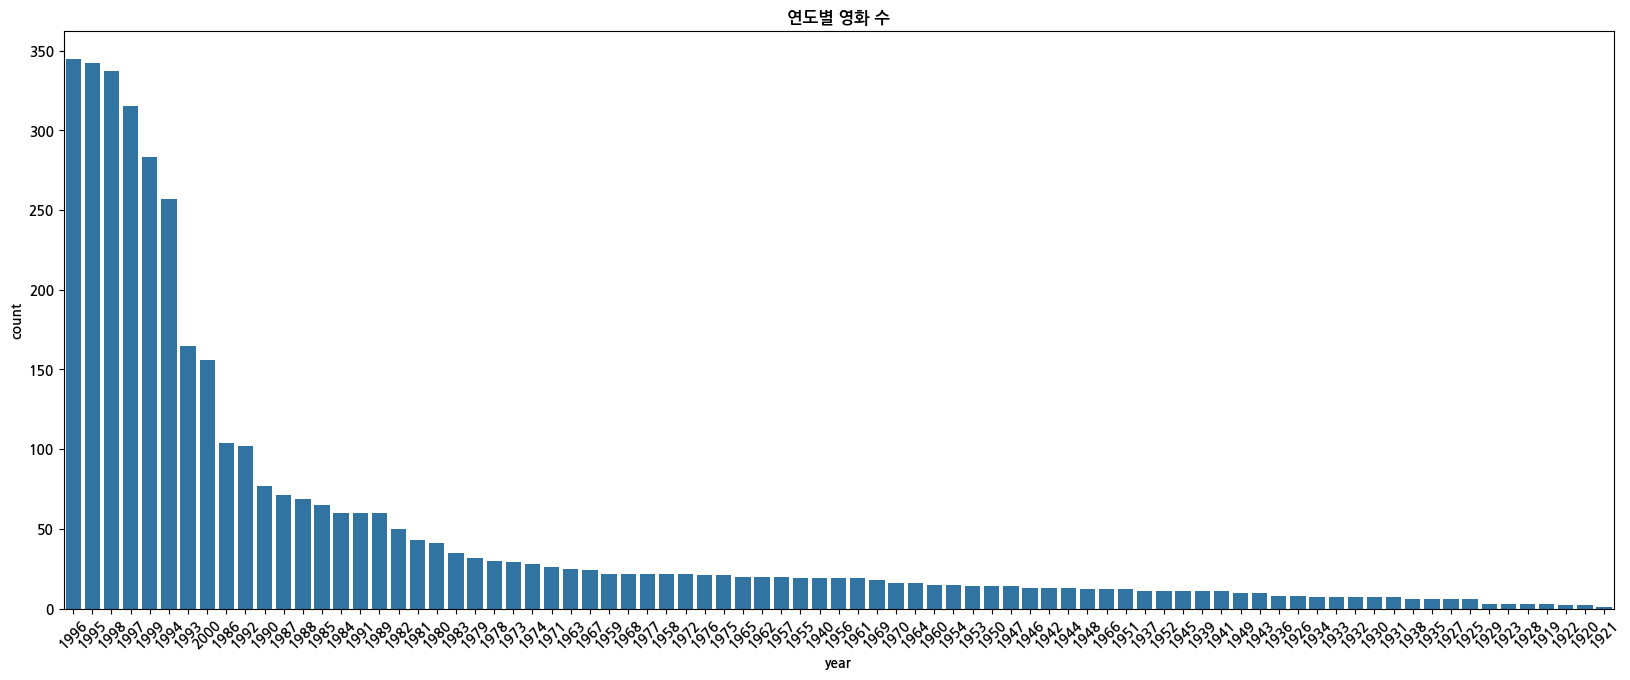

In [19]:
# seaborn 버전
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('연도별 영화 수')
plt.xticks(rotation=45)
plt.show()

**2.평점 데이터(ratings)**

이제 평점 데이터로 영화를 분석해보겠습니다.
평점 데이터에서는 평균 평점이나 장르별 평점과 같이 다양한 관점으로 분석할 수 있습니다.

평균 평점과 장르별 평점을 살펴봅시다.

먼저, 평점 데이터에서 movie_id를 기준으로 평점을 평균냅시다. 이는 groupby를 이용하면 빠르게 구할 수 있습니다

In [20]:
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


**⭐ 평점 분포**

평균 평점별 영화 수를 히스토그램으로 그려봅시다.

- x축: 평균 평점
- y축: 개수

In [21]:
# plotly 버전
px.histogram(mv_rating_agg, x='avg_rating', height=450, title='평점 분포')

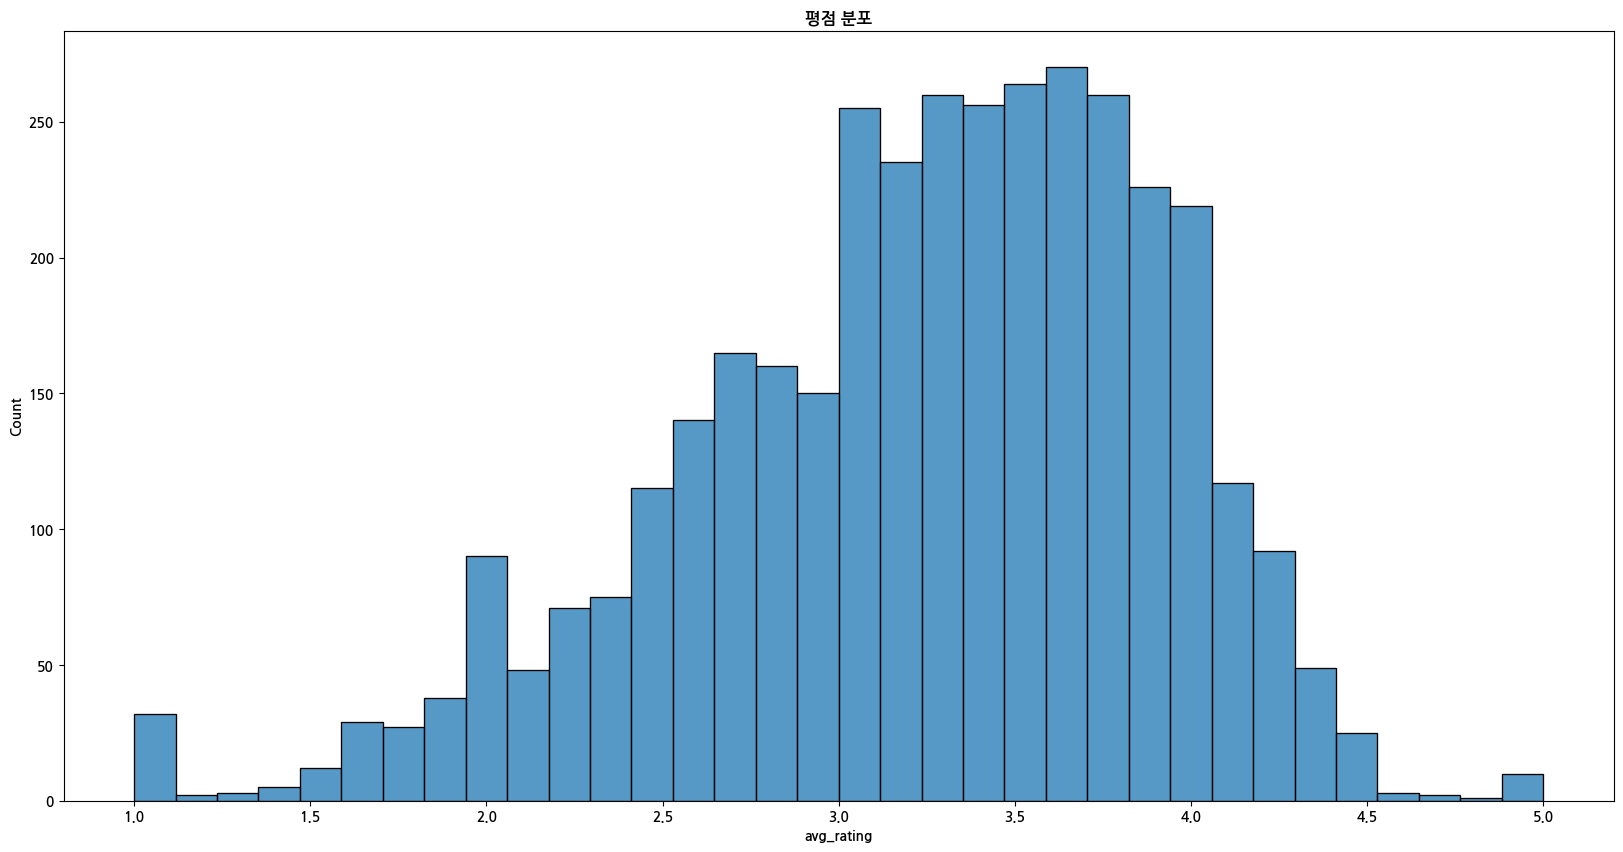

In [22]:
# seaborn 버전
sns.histplot(mv_rating_agg['avg_rating'], kde=False)
plt.gcf().set_size_inches(20, 10)
plt.title('평점 분포')
plt.show()

**3.장르별 평점 분포**

마지막으로 장르를 기준으로 평점 분석을 해보겠습니다.

위에서 우리는 장르를 genres_split으로 나누어 봤었는데요, 이 데이터를 활용해 장르 분포를 살펴볼 것입니다. 왜냐하면 하나의 영화에는 1개 이상의 장르가 연결되어 있기 때문입니다.

예를 들어 'Toy Story (1995)'는 3개(Animation, Children's, Comedy)의 장르를 가지고 있으니, 토이스토리 평점이 4점이라면 각 장르의 대한 점수도 4점이라고 가정하는 것이죠.

In [23]:
movies_exploded.head()

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's


장르별 평점 분포를 파악하기 위해 아래와 같은 순서로 데이터를 만들어 봅시다.

1. 영화 평점 데이터와 영화 데이터를 합쳐준다.

2. genre_split를 기준으로 groupby한다.

3. groupby할 때 rating을 기준으로 평균(mean)과 개수(count)를 뽑아낸다.

4. rating과 mean을 기준으로 정렬한다.

In [24]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']],
                              movies_exploded[['movie_id', 'genres_split']],
                              on='movie_id') \
                        .groupby('genres_split').agg({'rating': ['mean', 'count']}) \
                        .sort_values(('rating', 'mean')).reset_index()

rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


자! 이제 익숙한 형태로 데이터가 변환되었습니다.

이제 장르별 평점을 살펴볼까요?

앞에서는 영화별 평점 분포를 히스토그램으로 살펴보았습니다. 여기서는 장르 별 평점이기 때문에 바(bar) 차트를 활용해 볼겁니다.

- x축: 장르
- y축: 평균 평점

위와 같이 x축과 y축을 설정해서 바 차트를 만들어 봅시다

In [25]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_mean',
       height=350, title='장르별 평점').update_xaxes(categoryorder="total descending")

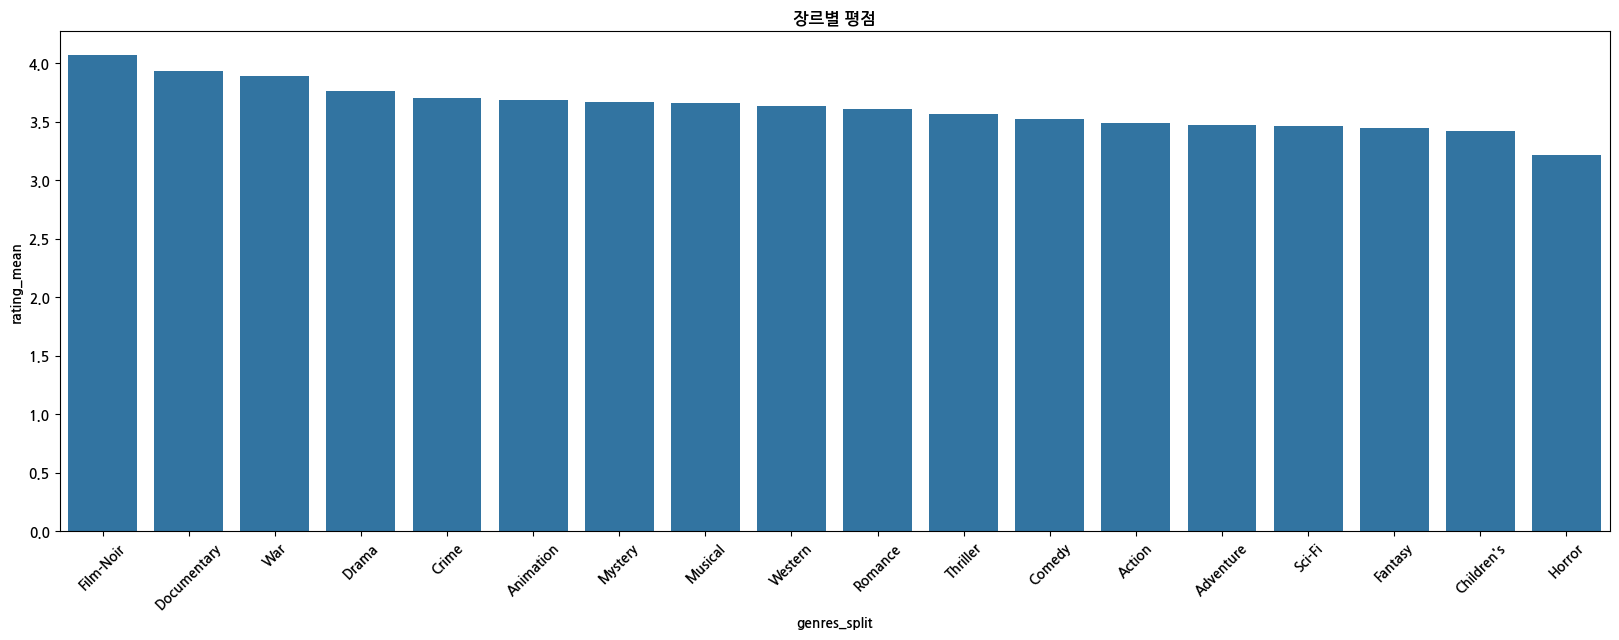

In [26]:
# seaborn 버전
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('장르별 평점')
plt.xticks(rotation=45)
plt.show()

모든 장르가 거의 비슷한 평점을 가지고 있는 것 같네요. 다만 호러물은 다른 장르에 비해 낮은 평점을 가지고 있습니다.

의외(?)로 다큐멘터리가 높은 평점을 가지고 있습니다. 😁

과연 다큐멘터리 평점이 신뢰할 수 있는 값일까요?
좀 더 살펴보기 위해 장르별로 평가 개수를 확인해 봅시다.

- x축: 장르
- y축: 평가 개수

In [27]:
# plotly 버전
px.bar(rating_by_genre_df, x='genres_split', y='rating_count',
       height=350, title='장르별 평가 개수').update_xaxes(categoryorder="total descending")

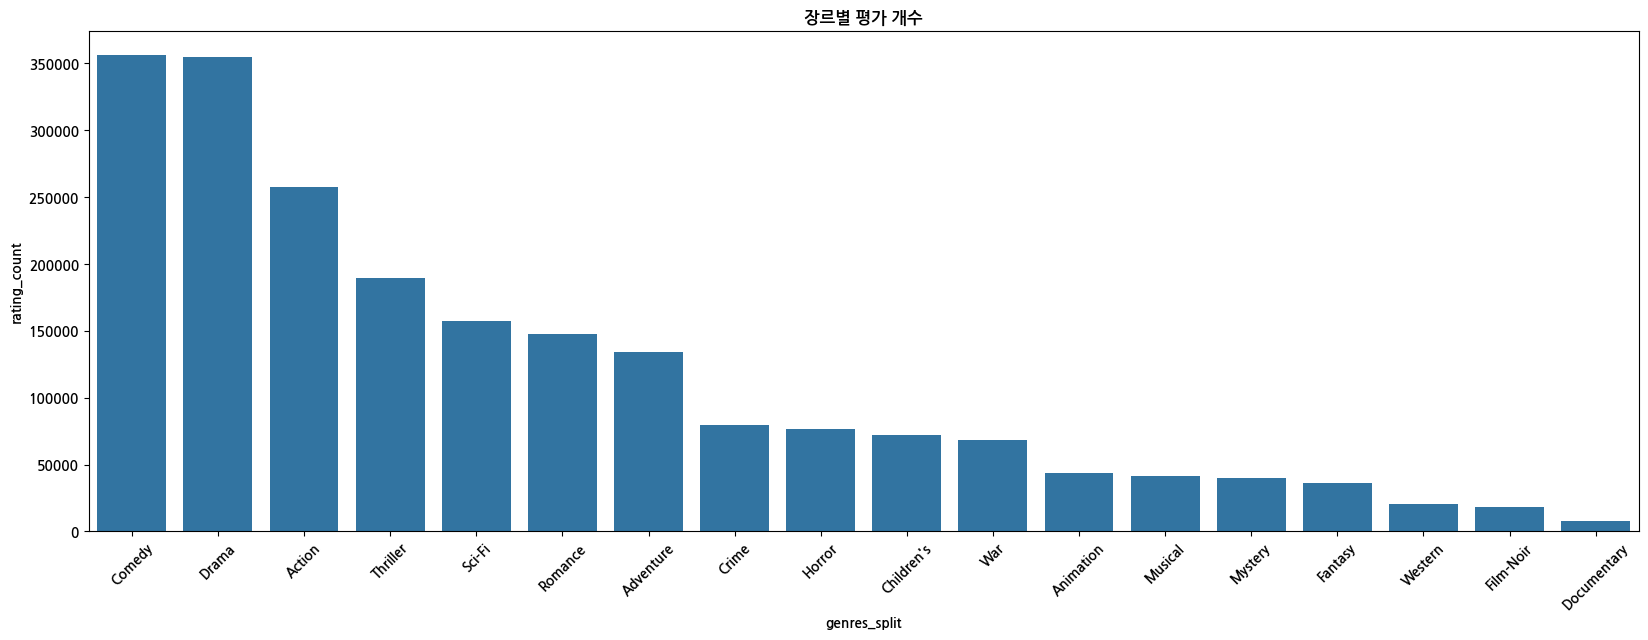

In [28]:
# seaborn 버전
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('장르별 평가 개수')
plt.xticks(rotation=45)
plt.show()

높은 평점을 가지고 있던 다큐멘터리의 평가 개수가 몇 개 없습니다. 어쩌면 편항되어 있는 데이터일 수도 있겠네요. 그리고 어쩌면, 다큐멘터리 영화를 본 사용자는 확실한 취향이 있을 수 있겠어요!



### 데이터 분석 마무리
___
간단하게 MovieLens1M 데이터를 살펴보았습니다. 복잡한 데이터가 아니니까 어느 정도는 'MovieLens1M 데이터는 이런 데이터구나'라는 감을 잡으셨을 것 같습니다.

이제부터는 실제 모델 훈련에 사용할 수 있도록 데이터를 전처리해보고 훈련용 데이터를 만들어 볼 것입니다.

아래는 참고용으로 제공해 드리는 코드입니다. 만약 사용자 데이터(users)와 사용자가 가지고 있는 직업(occupation)을 매핑해서 데이터를 깊게 살펴보고 싶다면 사용해 보세요.

In [29]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [30]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


## 데이터 전처리

이번에는 데이터를 전처리하고, 훈련용 데이터를 세팅하는 과정을 정리해 보려고 합니다.

원본 데이터를 그대로 모델에 넣는 것은 좋은 성능을 이끌어내기 힘들 수 있습니다.
특히 추천 시스템은 사용자와 아이템 사이의 상호작용을 모델링해야 하므로 데이터를 어떻게 설계하느냐에 따라 사용자와 아이템의 상호작용이 불가능할 수도 있습니다.

이번에 우리가 실습할 모델에서는 다음과 같은 피처(feature)들에 대해서 상호작용을 모델링하려고 합니다.

- 사용자 : 사용자 ID, 성별, 나이, 지역, 직업
- 영화 : 영화 ID, 장르, 시기
- 평점 : 사용자 ID, 영화 ID, 평점, 시기

즉 '어떤 사용자가 어떤 영화를 언제, 몇 점의 평가를 주었다'는 상호작용 데이터를 활용할 것입니다.

먼저 각 데이터를 다시 불러와서 확인해 봅시다.

In [31]:
# 라이브러리 호출
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import random
plt.rc('font', family='NanumMyeongjo')

In [32]:
# 컬럼 정보 지정
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [33]:
# 데이터 불러오기
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

In [34]:
# 사용자 데이터 확인
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [35]:
# 영화 데이터 확인
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
# 평점 데이터 확인
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 영화 데이터 전처리

영화 데이터(movies)를 전처리해 봅시다.

이전에는 영화 제목과 연도를 분리하는 과정만 진행했지만 이번에는 한 가지의 데이터를 더 추출해보려고 합니다.

바로 '년대'인데요, 예를 들어, 1995년에 개봉한 영화는 '90년대' 영화라고도 많이 말하죠. '년대' 정보를 뽑아내는 과정을 추가하려고 합니다.

왜냐하면 영화나 음악을 언급할 때 흔히 90년대 영화, 20년대 음악과 같이 '년대'식으로 많이 표현하기 때문이죠. 어떻게 보면 '년대'는 사람들에게 있어 중요한 정보가 될 수 있습니다.

In [37]:
# 제목 뒤에 붙어 있는 연도를 정규표현식을 활용해 추출합니다.
movies['movie_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

,movie_id,title,genres,movie_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


년대를 뽑아내는 과정은 어렵지 않습니다. 아래와 같은 순서로 년대를 뽑아낼 수 있죠.

1. 제목에서 영화의 연도를 뽑아낸다.

2. 연도에서 연도를 10으로 나눈 나머지를 빼면 년대이다.
  예) 1995년 영화

    - 1995 % 10 = 5
    - 1995 - 5 = 1990 ➔ 90년대 영화

이를 코드로 구현하면 아래와 같습니다.

In [38]:
a = 1995 % 10
b = 1995 - a

print(a)
print(b)

5
1990


In [39]:
# 90년대 영화, 2000년대 영화 등과 같은 년대 정보를 추출합니다.
movies['movie_decade'] = movies['title'].str.extract(r'\((\d{4})\)')[0].astype(int) \
                          .apply(lambda x: str(x - (x % 10)) + 's')

# title 컬럼에서 연도 정보를 빼고 제목만 따로 추출합니다.
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

In [40]:
movies.head()

,movie_id,title,genres,movie_year,movie_decade
0,1,Toy Story,Animation|Children's|Comedy,1995,1990s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990s
2,3,Grumpier Old Men,Comedy|Romance,1995,1990s
3,4,Waiting to Exhale,Comedy|Drama,1995,1990s
4,5,Father of the Bride Part II,Comedy,1995,1990s


이전에 했던 것과 같이 장르를 분리해서 추출합니다. 다만 이전에는 분리된 장르를 행(row)에 추가하였다면, 이번에는 컬럼(열)에 추가해 두겠습니다. 이렇게 구성하는 이유는 나중에 모델 input에 넣을 때 편리하기 때문입니다..






In [41]:
# | 기호를 기준으로 장르 데이터를 분리합니다.
genres_split = movies['genres'].str.split('|')
genres_split.head()

,genres
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]


In [42]:
max_genres = genres_split.apply(len).max()

# 각 장르별로 새로운 컬럼을 생성합니다.
for i in range(max_genres):
    movies[f'genre{i + 1}'] = genres_split.apply(lambda x: x[i] if i < len(x) else None)

# 원래 있던 장르 컬럼은 날려줍니다.
movies.drop('genres', axis=1, inplace=True)

# None은 공백으로 채웁니다.
movies.fillna('', inplace=True)

print(movies.shape)
movies.head()

(3883, 10)


,movie_id,title,movie_year,movie_decade,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story,1995,1990s,Animation,Children's,Comedy,,,
1,2,Jumanji,1995,1990s,Adventure,Children's,Fantasy,,,
2,3,Grumpier Old Men,1995,1990s,Comedy,Romance,,,,
3,4,Waiting to Exhale,1995,1990s,Comedy,Drama,,,,
4,5,Father of the Bride Part II,1995,1990s,Comedy,,,,,


모든 장르의 종류는 아래와 같습니다.






In [43]:
set(movies['genre1'].unique().tolist() \
  + movies['genre2'].unique().tolist() \
  + movies['genre3'].unique().tolist() \
  + movies['genre4'].unique().tolist() \
  + movies['genre5'].unique().tolist() \
  + movies['genre6'].unique().tolist() \
    )

{'',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### 평점 데이터 전처리
___
평점 데이터(ratings)도 조금 더 세분화하여 쪼갤 수 있습니다. 바로 `timestamp`를 이용하면 되는데요.

앞서 ratings에 있는 timestamp는 Unix timestamp라고 언급하였습니다. Unix timestamp란 1970년 1월 1일 00:00:00 UTC 이후 경과한 '초' 수를 말합니다. 따라서 '연-월-일' 로 변환이 필요합니다.

'년-월-일'로 변환하는 방법은 간단합니다. Unix timestamp는 워낙 많이 사용하기 때문에 이미 파이썬 내장 함수에도 기능이 존재기 때문이죠. datetime의 fromtimestamp 함수를 사용하면 바로 변환할 수 있습니다.

예를 살펴 볼까요?

In [44]:
timestamp = 978300760
dt_object = datetime.fromtimestamp(timestamp)

print(dt_object.strftime("%Y-%m-%d"))

2000-12-31


평점 데이터 전체에 적용해 봅시다.






In [45]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,2000-12-31
1,1,661,3,2000-12-31
2,1,914,3,2000-12-31
3,1,3408,4,2000-12-31
4,1,2355,5,2001-01-06


변환된 '년-월-일' 데이터를 활용해서 년도, 월, 그리고 년대를 뽑아냅시다.






In [46]:
ratings['rating_year'] = ratings['timestamp'].apply(lambda x : x.split("-")[0])
ratings['rating_month'] = ratings['timestamp'].apply(lambda x : x.split("-")[1])
ratings['rating_decade'] = ratings['rating_year'].astype(int).apply(lambda x: str(x - (x % 10)) + 's')

ratings.head()

,user_id,movie_id,rating,timestamp,rating_year,rating_month,rating_decade
0,1,1193,5,2000-12-31,2000,12,2000s
1,1,661,3,2000-12-31,2000,12,2000s
2,1,914,3,2000-12-31,2000,12,2000s
3,1,3408,4,2000-12-31,2000,12,2000s
4,1,2355,5,2001-01-06,2001,01,2000s


이렇게 뽑아낸 데이터들은 임시로 저장을 해두겠습니다. 임시 저장은 필수는 아니지만, 편의를 위해 저장해두려고 합니다.

저장된 데이터들은 _prepro라는 이름을 붙여서 csv 형태로 저장해 두겠습니다.

In [47]:
# 임시 저장
movies.to_csv(f"{data_path}/movies_prepro.csv", index=False)
ratings.to_csv(f"{data_path}/ratings_prepro.csv", index=False)
users.to_csv(f"{data_path}/users_prepro.csv", index=False)

In [48]:
!ls ./autoint/ml-1m

movielens_rcmm_v1.csv  movies_prepro.csv   README
movielens_rcmm_v2.csv  ratings.dat	   users.dat
movies.dat	       ratings_prepro.csv  users_prepro.csv


### 모델 입력 데이터 생성
___
추천 시스템에 활용되는 데이터는 크게 아래와 같이 구분될 수 있습니다.

- 명식적 데이터(Explicit data): 사용자가 직접적으로 선호도를 표현한 데이터(예: 평점, 구독, 댓글, 리뷰, 좋아요, 싫어요, 차단 등)
- 암묵적 데이터(Implicit data): 사용자가 간접적으로 선호도를 표현한 데이터(예: 클릭 여부, 검색 기록, 방문 페이지, 마우스 움직임, 구매 내역, 시청 시간대 등)
명시적 데이터, 예를 들어 평점 데이터라면 1~5점과 같은 분포로 데이터가 존재하게 되고 이는 이진 분류(binary classification) 문제라기 보다 회귀(regression) 문제나 다중 분류(multiclass classification) 문제라고 볼 수 있을 것입니다.

하지만 암묵적 데이터인 클릭 여부로 보면 어떨까요?

클릭 여부는 '클릭을 했다, 안했다'와 같이 0과 1로 분리할 수 있습니다. 이 때 클릭을 했다는 것은 '선호'한다라는 의미도 담고 있기에, 선호 정보를 모델링한다고도 볼 수 있습니다.

무엇이 정답인지는 따로 정해진 바가 없습니다. 데이터와 서비스 전략에 따라 정답은 달라집니다.

이번 프로젝트에서는 '선호했다'를 기준으로 살펴보려고 합니다.

그런데 여기서 문제가 하나 있습니다. 그럼 '선호했다'라는 정보는 무엇이고 '선호하지 않는다'라는 정보는 무엇일까요? 그리고 그런 데이터가 MovieLens에 있을까요? 이 문제를 풀어나가보려고 합니다.

**1. 랜덤 샘플링 기반 방법**

우리가 가지고 있는 데이터에서 '선호도'를 뽑아내기 위한 데이터로는 평점 데이터(ratings)가 있습니다. 사용자가 영화에 평점을 매긴 데이터이죠.

문제는 평점이 1부터 5점까지라서 '어떤 것을 선호한다'라고 말하기 어렵습니다. 그래서 여기서부터는 가설을 세우고 진행하는 것이 좋습니다.

우리는 먼저 랜덤 샘플링 기반 방법으로 '선호', '비선호'를 추출할 겁니다. 순서는 아래와 같습니다.

<br>

1.선호 데이터를 추출한다.

- 사용자가 3점 이상의 점수를 부여한 영화를 '선호'한다고 가정한다.
- 이 데이터는 `label=1`인 값이다.

<br>

2.비선호 데이터를 추출한다.

- 2-1. 사용자가 선호했던 영화 리스트를 추출한다

- 2-2. 전체 영화 중 사용자가 선호한다고 체크하지 않은 영화 리스트를 추출한다. 만약 전체 영화가 100개이고 사용자가 선호한다고 한 영화가 10개라면, 선호하지 않은 영화는 90개이다.

- 2-3. 영화 리스트 중 일부를 랜덤으로 샘플링한다. 이때 선호 영화 1개당 5개의 비선호 영화를 추출한다. 예를 들어 선호 영화가 10개라면 비선호 영화는 총 50개를 추출한다. 즉 비선호 영화 90개 중 50개를 추출하는 것이다.

- 2-4. 이 비선호 영화를 `label=0`으로 세팅한다.

<br>

이제 위와 같은 순서로 하나씩 체크하면서 진행합시다.

In [49]:
# 1. 3점 이상의 점수를 부여한 영화를 '선호'영화라고 가정하고, 이를 label=1로 생성합니다.
ratings = ratings[ratings['rating'] >= 3]
ratings['label'] = 1

ratings.drop('rating', axis=1, inplace=True)
print(ratings.shape)
ratings.head()

(836478, 7)


,user_id,movie_id,timestamp,rating_year,rating_month,rating_decade,label
0,1,1193,2000-12-31,2000,12,2000s,1
1,1,661,2000-12-31,2000,12,2000s,1
2,1,914,2000-12-31,2000,12,2000s,1
3,1,3408,2000-12-31,2000,12,2000s,1
4,1,2355,2001-01-06,2001,01,2000s,1


In [50]:
# 1. 사용자가 봤던(선호했던) 영화 리스트를 추출합니다. 사용자마다 평점이 3점 이상인 영화 리스트가 구성됩니다.
user_seen_movies = ratings.groupby('user_id')['movie_id'].apply(list).reset_index()
user_seen_movies.head()

,user_id,movie_id
0,1,"[1193, 661, 914, 3408, 2355, 1197, 1287, 2804,..."
1,2,"[1357, 3068, 1537, 647, 2194, 648, 2268, 2628,..."
2,3,"[3421, 648, 1394, 3534, 104, 2735, 1210, 1431,..."
3,4,"[3468, 1210, 2951, 1214, 1036, 260, 2028, 480,..."
4,5,"[2987, 2333, 1175, 39, 2337, 1535, 1392, 1466,..."


In [51]:
# 2. 먼저 고유 영화와 고유 사용자들을 가지고 옵니다.
unique_movies = movies['movie_id'].unique()
unique_users = users['user_id'].unique()

negative_users = []
negative_movies = []
negative_labels = []

# 사용자별로 하나씩 진행합니다.
for user in unique_users:
    # 충분한 이력이 없는 사용자는 넘어갑니다. 충분한 이력이 없는 사용자 데이터는 훈련에 방해가 되고 overfitting 등이 될 수 있습니다.
    if len(user_seen_movies[user_seen_movies['user_id'] == user]) < 1:
        continue

    # 2-1. 해당 사용자가 선호하는 영화 리스트를 가지고 옵니다.
    user_seen_movie_list = user_seen_movies[user_seen_movies['user_id'] == user]['movie_id'].values[0]

    # 2-2. 전체 영화 중 사용자가 선호한 영화 정보를 제외합니다.
    user_non_seen_movie_list = list(set(unique_movies) - set(user_seen_movie_list))

    # 2-3. 선호 영화 1개당 비선호 영화 5개를 추출합니다.
    sample_pop_size = len(user_seen_movie_list)*5

    # 만약 비선호 영화 샘플 개수가 전체 영화 개수보다 크면, 비선호 영화 샘플 개수는 전체 영화 개수에서 사용자가 선호한 영화의 개수를 뺀 값(해당 사용자 입장에선 샘플링 최대 값)으로 설정합니다.
    if len(unique_movies) - len(user_seen_movie_list) < len(user_seen_movie_list)*5 :
        sample_pop_size = len(unique_movies) - len(user_seen_movie_list)

    # 랜덤으로 추출합니다.
    user_negative_movie_list = random.sample(user_non_seen_movie_list, sample_pop_size)

    # 해당 값들을 리스트에 저장합니다.
    negative_users += [user for _ in range(len(user_negative_movie_list))]
    negative_movies += user_negative_movie_list
    negative_labels += [0 for _ in range(len(user_negative_movie_list))]

이렇게 만들어진 리스트는 사용자가 '비선호'한다는 정보를 담고 있습니다. 따라서, label도 0입니다.
이제 이 데이터를 하나의 데이터프레임으로 만들고 사용자 선호 정보와 합쳐주면 0과 1이 조합된 훈련 데이터가 만들어 집니다.

In [52]:
print(len(negative_users))
print(len(negative_movies))
print(len(negative_labels))

4068124
4068124
4068124


In [53]:
negative_ratings_df = pd.DataFrame({
    'user_id' : negative_users,
    'movie_id' : negative_movies,
    'label':negative_labels
    })
print(negative_ratings_df.shape)
negative_ratings_df.head()

(4068124, 3)


,user_id,movie_id,label
0,1,3628,0
1,1,2108,0
2,1,508,0
3,1,3139,0
4,1,657,0


최종적으로 모델 훈련에 사용하는 데이터를 구성하기 위해서 필요한 컬럼만 추출해 활용합니다. 필요한 컬럼은 아래와 같습니다.

- 평점 : 사용자 ID, 영화 ID, 레이블(label)
- 영화 : 영화 ID, 년대, 년도, 장르1
- 사용자 : 사용자 ID, 성별, 나이, 지역, 직업

이 데이터를 모아 하나로 합쳐줍니다.

In [54]:
ratings_df = ratings[['user_id', 'movie_id', 'label']]
ratings_df = pd.concat([ratings_df, negative_ratings_df], axis=0)

movies_df = movies[['movie_id', 'movie_decade', 'movie_year', 'genre1']]
movies_df.columns = ['movie_id', 'decade', 'movie_year', 'genre']

user_df = users[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [55]:
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, user_df, on='user_id')
merge_mlens_data.dropna(inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,label,decade,movie_year,genre,gender,age,occupation,zip
0,1,1193,1,1970s,1975,Drama,F,1,10,48067
1,1,661,1,1990s,1996,Animation,F,1,10,48067
2,1,914,1,1960s,1964,Musical,F,1,10,48067
3,1,3408,1,2000s,2000,Drama,F,1,10,48067
4,1,2355,1,1990s,1998,Animation,F,1,10,48067


In [56]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','decade', 'movie_year', 'genre', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,decade,movie_year,genre,gender,age,occupation,zip,label
0,1,1193,1970s,1975,Drama,F,1,10,48067,1
1,1,661,1990s,1996,Animation,F,1,10,48067,1
2,1,914,1960s,1964,Musical,F,1,10,48067,1
3,1,3408,2000s,2000,Drama,F,1,10,48067,1
4,1,2355,1990s,1998,Animation,F,1,10,48067,1


In [57]:
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v1.csv', index=False)

In [58]:
!ls -l ./autoint/ml-1m

total 332940
-rw-r--r-- 1 root root 211803677 Nov  5 05:12 movielens_rcmm_v1.csv
-rw-r--r-- 1 root root  67335303 Nov  5 03:18 movielens_rcmm_v2.csv
-rw-r----- 1 root root    171308 Mar 26  2003 movies.dat
-rw-r--r-- 1 root root    198094 Nov  5 05:11 movies_prepro.csv
-rw-r----- 1 root root  24594131 Feb 28  2003 ratings.dat
-rw-r--r-- 1 root root  36558754 Nov  5 05:11 ratings_prepro.csv
-rw-r----- 1 root root      5577 Jan 29  2016 README
-rw-r----- 1 root root    134368 Feb 28  2003 users.dat
-rw-r--r-- 1 root root    110242 Nov  5 05:11 users_prepro.csv


2.선호도로 나누기

위에서 진행한 '1. 랜덤 샘플링 기반 방법'은 그리 좋은 방법은 아닙니다. 왜냐하면 사용자 정보를 무작위로 샘플링을 해서 임의로 데이터를 생성했기 때문입니다. 가장 좋은 것은 원본 데이터를 활용하는 것이죠.

따라서 2번째 과정에서는 샘플링을 하지 않고 데이터를 선호도로 나누려고 합니다. 이후 모델을 훈련할 때도 이 데이터를 활용할 것입니다.

먼저 데이터 전처리를 하고 저장했던 데이터를 불러옵시다.

In [59]:
users_df = pd.read_csv(f'{data_path}/users_prepro.csv')
ratings_df = pd.read_csv(f'{data_path}/ratings_prepro.csv')
movies_df = pd.read_csv(f'{data_path}/movies_prepro.csv')

In [60]:
print(users_df.columns)
print(ratings_df.columns)
print(movies_df.columns)

Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'rating_year',
       'rating_month', 'rating_decade'],
      dtype='object')
Index(['movie_id', 'title', 'movie_year', 'movie_decade', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5', 'genre6'],
      dtype='object')


1번 과정에서는 평점이 3점 이상인 데이터를 label=1로 설정하고 label=0은 랜덤 샘플링으로 추출했는데요, 이번 과정에서는 다음과 같은 순서로 데이터 선호도를 구성합니다.

1. 평점이 4점 이상인 데이터를 label=1, 나머지를 label=0
2. 필요한 데이터만 추출하고 저장

앞선 과정보다 굉장히 간단하죠?

In [61]:
# 1. 4점 이상인 데이터를 1로, 아닌 데이터를 0으로 설정합니다.
ratings_df['label'] = ratings_df['rating'].apply(lambda x : x >=4).astype(int)

ratings_df = ratings_df[['user_id', 'movie_id', 'rating_year','rating_month', 'rating_decade', 'label']]
ratings_df.head()

,user_id,movie_id,rating_year,rating_month,rating_decade,label
0,1,1193,2000,12,2000s,1
1,1,661,2000,12,2000s,0
2,1,914,2000,12,2000s,0
3,1,3408,2000,12,2000s,1
4,1,2355,2001,1,2000s,1


In [62]:
# 2. 필요 데이터만 가지고 옵니다. 특히 장르는 3개만 가지고 와서 활용합니다.
movies_df = movies_df[['movie_id', 'movie_decade', 'movie_year', 'genre1', 'genre2', 'genre3']]
users_df = users_df[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [63]:
# 필요한 데이터를 합쳐줍니다.
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, users_df, on='user_id')
merge_mlens_data.fillna('no', inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,rating_year,rating_month,rating_decade,label,movie_decade,movie_year,genre1,genre2,genre3,gender,age,occupation,zip
0,1,1193,2000,12,2000s,1,1970s,1975,Drama,no,no,F,1,10,48067
1,1,661,2000,12,2000s,0,1990s,1996,Animation,Children's,Musical,F,1,10,48067
2,1,914,2000,12,2000s,0,1960s,1964,Musical,Romance,no,F,1,10,48067
3,1,3408,2000,12,2000s,1,2000s,2000,Drama,no,no,F,1,10,48067
4,1,2355,2001,1,2000s,1,1990s,1998,Animation,Children's,Comedy,F,1,10,48067


In [64]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2000,12,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2000,12,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2000,12,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2000,12,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [65]:
# 저장합니다.
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v2.csv', index=False)

저장한 데이터를 학습 데이터로 사용하려고 합니다.

이제 실제 모델링 수행 과정 단계로 넘어갑시다!

## AutoInt 모델 구현 및 학습

### 추천 모델 학습

이전에 배웠던 '추천 시스템, 모델 톺아보기: 논문과 코드'에서 AutoInt라는 모델을 보았습니다.

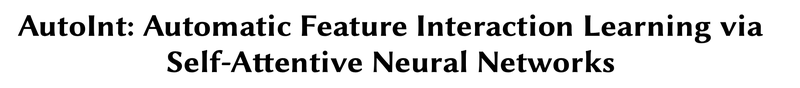
기억을 되짚어보는 차원에서 핵심적인 것만 다시 복습해보면

AutoInt 모델은

- 멀티헤드 셀프 어텐션(multi-head self-attention)구조를 활용해 입력 피처들간의 상호작용과 관계성을 모델링
- 쌓아올린 구조(stack)를 통해 서로 다른 차원에서 피처 상호작용 학습
- 고차 상호작용을 명시적(explicitly) & 자동(automatic)으로 학습
의 특징을 가지고 추천 모델을 구성하게 됩니다.

전체 아키텍처는 다음과 같습니다.

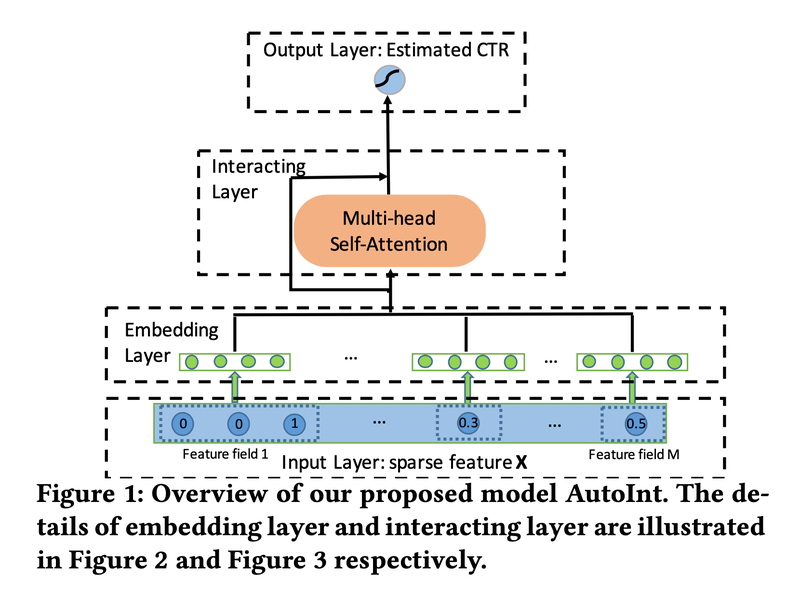

여기서 가장 중요한 부분은 바로 '멀티헤드 셀프어텐션 구조를 활용해서 피처간의 상호작용을 모델링한다'입니다. 그렇기에 이 모델의 코드를 이해할 때 해당 부분을 잘 이해하기만 한다면 코드 작업은 끝이라고 볼 수 있습니다.

자, 이제 시작해보죠!

### 필요한 라이브러리 불러오기


In [66]:
import time
import random
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MaxPooling2D, Conv2D, Dropout, Lambda, Dense, Flatten, Activation, Input, Embedding, BatchNormalization
from tensorflow.keras.initializers import glorot_normal, Zeros, TruncatedNormal
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy


from tensorflow.keras.optimizers import Adam
from collections import defaultdict
import math

### Layer 정의
AutoInt에 사용되는 Layer는 총 3가지입니다.

<br>

1.임베딩 레이어
- 임베딩 레이어는 raw input 데이터를 저차원 임베딩 공간에 매핑하는 과정을 의미합니다.
- 예를 들어 성별이 남, 여가 있다면 이는 각각 0과 1로 매핑될 수 있고, 0에 해당되는 32차원 임베딩 공간, 1에 해당되는 임베딩 공간에 매핑하는 과정이죠.

<br>

2.다층 퍼셉트론(MLP-Multilayer Perceptron, DNN 구조)
- 딥러닝을 배우면 거의 가장 먼저 배울 수 있는 구조입니다.
- 비선형 레이어를 쌓아올린 구조입니다. Dense layer를 쌓아올린 구조라고 보시면 됩니다.

<br>

3.멀티 헤드 어텐션
- 쿼리(query), 키(key), 값(value)에 따른 어텐션을 계산하는 구조입니다.
- 본 모델에서는 셀프 어텐션 구조로 진행됩니다.

**임베딩 레이어**





In [67]:
class FeaturesEmbedding(Layer):
    '''
    임베딩 레이어입니다.
    - 만약 피처(feature) 3개가 각각 10개, 20개, 30개의 고유값을 가진다면 feature_dims는 [10, 20, 30] 형태를 띄게 됩니다.
    - 전체 임베딩을 해야 할 개수는 10+20+30 = 60이므로 '60 x 임베딩_차원_크기'의 행렬이 생성되게 됩니다.
    '''
    def __init__(self, field_dims, embed_dim, **kwargs):
        super(FeaturesEmbedding, self).__init__(**kwargs)
        self.total_dim = sum(field_dims)
        self.embed_dim = embed_dim
        self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.longlong)
        self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

    def build(self, input_shape):
        # 임베딩을 빌드하고 초기화합니다.
        self.embedding.build(input_shape)
        self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

    def call(self, x):
        # 들어온 입력의 임베딩을 가져니다.
        x = x + tf.constant(self.offsets)
        return self.embedding(x)

**다층 퍼셉트론**





In [68]:
class MultiLayerPerceptron(Layer):
    '''
    DNN 레이어입니다.
    - Tensorflow Keras에서는 Dense 레이어를 쌓아올린 구조입니다.
    - 필요에 따라 배치 정규화도 사용할 수 있습니다.
    '''
    def __init__(self, input_dim, hidden_units, activation='relu', l2_reg=0, dropout_rate=0, use_bn=False, init_std=0.0001, output_layer=True):
        super(MultiLayerPerceptron, self).__init__()
        self.dropout_rate = dropout_rate
        self.use_bn = use_bn
        hidden_units = [input_dim] + list(hidden_units)
        if output_layer:
            hidden_units += [1]
        # Dense layer를 쌓아올립니다.
        self.linears = [Dense(units, activation=None, kernel_initializer=tf.random_normal_initializer(stddev=init_std),
                              kernel_regularizer=tf.keras.regularizers.l2(l2_reg)) for units in hidden_units[1:]]
        # 활성화 함수를 세팅합니다.
        self.activation = tf.keras.layers.Activation(activation)
        # 필요하다면 배치정규화도 진행합니다.
        if self.use_bn:
            self.bn = [BatchNormalization() for _ in hidden_units[1:]]
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training=False):
        x = inputs
        for i in range(len(self.linears)):
            # input data가 들어오면 layer를 돌면서 벡터 값을 가져오게 됩니다.
            x = self.linears[i](x)
            if self.use_bn:
                x = self.bn[i](x, training=training)
            # 각 layer마다 나온 벡터 값에 활성화 함수와 dropout을 적용시켜 비선형성 구조와 과적합을 방지합니다.
            x = self.activation(x)
            x = self.dropout(x, training=training)
        return x

**멀티 헤드 어텐션**

다음은 멀티헤드 셀프어텐션입니다.

수식으로 표현하면 아래와 같은 구조입니다. 트랜스포머와 동일한 구조입니다.

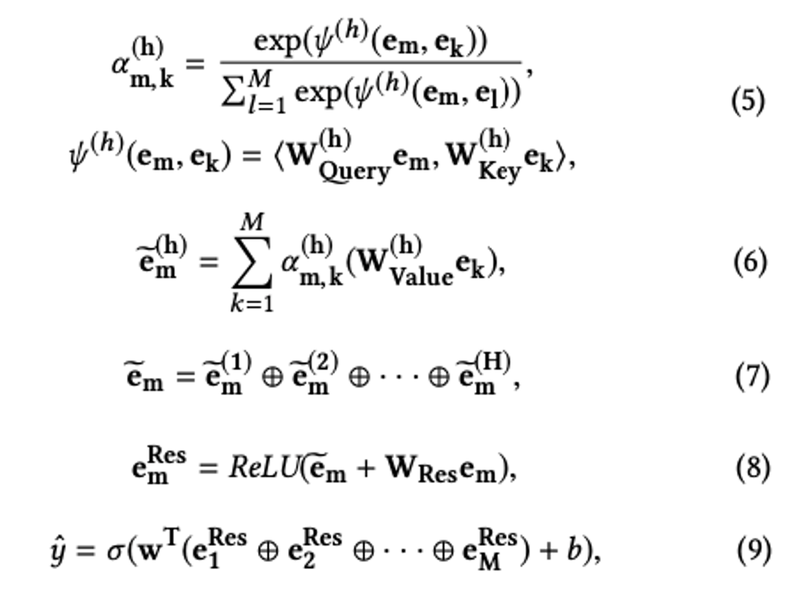

In [69]:
class MultiHeadSelfAttention(Layer):
    '''
    멀티 헤드 셀프 어텐션 레이어입니다.
    - 위에 작성한 수식과 같이 동작됩니다.
    - 필요에 따라 잔차 연결(residual connection)도 진행합니다.
    '''
    def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
        if head_num <= 0:
            raise ValueError('head_num must be a int > 0')
        self.att_embedding_size = att_embedding_size
        self.head_num = head_num
        self.use_res = use_res
        self.seed = seed
        self.scaling = scaling
        super(MultiHeadSelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        if len(input_shape) != 3:
            raise ValueError(
                "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (len(input_shape)))
        embedding_size = int(input_shape[-1])
        # 쿼리에 해당하는 매트릭스입니다.
        self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed))
        # 키에 해당되는 매트릭스입니다.
        self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                     dtype=tf.float32,
                                     initializer=TruncatedNormal(seed=self.seed + 1))
        # 값(value)에 해당되는 매트릭스입니다.
        self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       dtype=tf.float32,
                                       initializer=TruncatedNormal(seed=self.seed + 2))
        # 필요하다면 잔차 연결도 할 수 있습니다.
        if self.use_res:
            self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                         dtype=tf.float32,
                                         initializer=TruncatedNormal(seed=self.seed))

        super(MultiHeadSelfAttention, self).build(input_shape)

    def call(self, inputs, **kwargs):
        if K.ndim(inputs) != 3:
            raise ValueError("Unexpected inputs dimensions %d, expect to be 3 dimensions" % (K.ndim(inputs)))

        # 입력이 들어오면 쿼리, 키, 값(value)에 매칭되어 각각의 값을 가지고 옵니다.
        querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))
        keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
        values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

        # 헤드 개수에 따라 데이터를 분리해줍니다.
        querys = tf.stack(tf.split(querys, self.head_num, axis=2))
        keys = tf.stack(tf.split(keys, self.head_num, axis=2))
        values = tf.stack(tf.split(values, self.head_num, axis=2))

        # 쿼리와 키를 먼저 곱해줍니다. 위 이미지의 식 (5)와 같습니다.
        inner_product = tf.matmul(querys, keys, transpose_b=True)
        if self.scaling:
            inner_product /= self.att_embedding_size ** 0.5
        self.normalized_att_scores =  tf.nn.softmax(inner_product)

        # 쿼리와 키에서 나온 어텐션 값을 값(value)에 곱해줍니다. 식 (6)과 같습니다.
        result = tf.matmul(self.normalized_att_scores, values)
        # 식 (7)과 같이 쪼개어진 멀테 헤드를 모아줍니다.
        result = tf.concat(tf.split(result, self.head_num, ), axis=-1)
        result = tf.squeeze(result, axis=0)

        if self.use_res:
            result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
        result = tf.nn.relu(result)

        # 그 결과 값을 리턴합니다.

        return result

    def compute_output_shape(self, input_shape):
        return (None, input_shape[1], self.att_embedding_size * self.head_num)

    def get_config(self, ):
        config = {'att_embedding_size': self.att_embedding_size, 'head_num': self.head_num, 'use_res': self.use_res,'seed': self.seed}
        base_config = super(MultiHeadSelfAttention, self).get_config()
        base_config.update(config)
        return base_config

### AutoInt 모델
___

In [70]:
class AutoInt(Layer):
    '''
     AutoInt 본체입니다. 앞서서 정의한 layer를 가져와서 계산을 수행합니다.
    '''
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoInt, self).__init__()
        # 임베딩 레이어를 정의합니다.
        self.embedding = FeaturesEmbedding(field_dims, embedding_size)
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size
        # 마지막 출력 레이어를 정의합니다.
        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        # 멀티 레이어 퍼셉트론 레이어를 정의합니다.
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]

    def call(self, inputs):
        # input 데이터에 해당되는 embedding 값을 가져옵니다.
        att_input = self.embedding(inputs)
        # 멀티 헤드 셀프 어텐션 레이어에서 상호작용을 수행합니다.
        for layer in self.int_layers:
            att_input = layer(att_input)

        att_output = Flatten()(att_input)
        # 최종 출력입니다.
        att_output = self.final_layer(att_output)
        # sigmoid로 예측값을 출력합니다.
        y_pred = tf.nn.sigmoid(att_output)

        return y_pred

### 평가 지표
___

In [71]:
# 평가 함수는 아래의 링크에서 가져왔습니다.
# https://www.programcreek.com/python/?code=MaurizioFD%2FRecSys2019_DeepLearning_Evaluation%2FRecSys2019_DeepLearning_Evaluation-master%2FConferences%2FKDD%2FMCRec_our_interface%2FMCRecRecommenderWrapper.py
def get_DCG(ranklist, y_true):
    dcg = 0.0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item in y_true:
            dcg += 1.0 / math.log(i + 2)
    return  dcg

def get_IDCG(ranklist, y_true):
    idcg = 0.0
    i = 0
    for item in y_true:
        if item in ranklist:
            idcg += 1.0 / math.log(i + 2)
            i += 1
    return idcg

def get_NDCG(ranklist, y_true):
    '''NDCG 평가 지표'''
    ranklist = np.array(ranklist).astype(int)
    y_true = np.array(y_true).astype(int)
    dcg = get_DCG(ranklist, y_true)
    idcg = get_IDCG(y_true, y_true)
    if idcg == 0:
        return 0
    return round( (dcg / idcg), 5)

def get_hit_rate(ranklist, y_true):
    '''hitrate 평가 지표'''
    c = 0
    for y in y_true:
        if y in ranklist:
            c += 1
    return round( c / len(y_true), 5 )

### 모델 테스트
___

In [72]:
def test_model(model, test_df):
    '''모델 테스트'''
    user_pred_info = defaultdict(list)
    total_rows = len(test_df)
    for i in range(0, total_rows, batch_size):
        features = test_df.iloc[i:i + batch_size, :-1].values
        y_pred = model.predict(features, verbose=False)
        for feature, p in zip(features, y_pred):
            u_i = feature[:2]
            user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))
    return user_pred_info

### 데이터 불러오기 및 세팅
___
전처리하였던 데이터를 불러옵니다. 이 데이터를 모델에 바로 사용할 수 없는데요. 모델 input으로 넣어 학습하기 위해서는 다음과 같은 과정을 거쳐야 합니다.

1. 데이터 불러오기
2. 레이블 인코더(label encoder)를 통해 0부터 피처(feature)의 고유 개수까지 매핑

  - 예) 성별: 남(M), 여(F)를 0, 1로 변환
  - 예) 장르: 코메디, 드라마, 액션을 0, 1, 2로 변환

3. 학습(train) 데이터와 테스트(test) 데이터로 분리

하나씩 살펴봅시다.

In [73]:
# 1. 데이터 불러오기
# csv 데이터이므로 read_csv로 가져옵니다.
movielens_rcmm = pd.read_csv(f"{data_path}/movielens_rcmm_v2.csv", dtype=str)
print(movielens_rcmm.shape)
movielens_rcmm.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2000,12,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2000,12,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2000,12,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2000,12,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [74]:
# 2. 라벨 인코더(label encoder)
# sklearn의 LabelEncoder(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
# label은 제외한 각 컬럼을 돌면서 각각의 고윳값들을 0부터 n까지 매핑시킵니다.
label_encoders = {col: LabelEncoder() for col in movielens_rcmm.columns[:-1]} # label은 제외

for col, le in label_encoders.items():
    movielens_rcmm[col] = le.fit_transform(movielens_rcmm[col])

In [75]:
movielens_rcmm.head()

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,0,189,6,55,0,3,0,7,17,15,0,0,2,1588,1
1,0,3374,8,76,0,3,0,2,2,8,0,0,2,1588,0
2,0,3615,5,44,0,3,0,11,12,15,0,0,2,1588,0
3,0,2503,9,80,0,3,0,7,17,15,0,0,2,1588,1
4,0,1374,8,78,1,0,0,2,2,2,0,0,2,1588,1


In [76]:
movielens_rcmm['label'] = movielens_rcmm['label'].astype(np.float32)

In [77]:
# 3. 학습 데이터와 테스트데이터로 분리, 0.2 정도로 분리
train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800167 entries, 416292 to 121958
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        800167 non-null  int64  
 1   movie_id       800167 non-null  int64  
 2   movie_decade   800167 non-null  int64  
 3   movie_year     800167 non-null  int64  
 4   rating_year    800167 non-null  int64  
 5   rating_month   800167 non-null  int64  
 6   rating_decade  800167 non-null  int64  
 7   genre1         800167 non-null  int64  
 8   genre2         800167 non-null  int64  
 9   genre3         800167 non-null  int64  
 10  gender         800167 non-null  int64  
 11  age            800167 non-null  int64  
 12  occupation     800167 non-null  int64  
 13  zip            800167 non-null  int64  
 14  label          800167 non-null  float32
dtypes: float32(1), int64(14)
memory usage: 94.6 MB


In [79]:
# 필요 컬럼들과 레이블 정의
# 필드의 각 고유 개수를 정의하는 field_dims를 정의합니다. 이는  임베딩 때 활용됩니다.
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'

field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int64).values, axis=0) + 1
field_dims

array([6040, 3706,   10,   81,    4,   12,    1,   18,   18,   16,    2,
          7,   21, 3439])

### 훈련 환경 및 모델 세팅
___
이제 추천 모델 훈련을 진행하면 됩니다. 훈련에 앞서 환경을 정의해야겠죠?

1. 드롭아웃, 배치사이즈 등 모델 훈련, 모델 설정 등의 세팅
2. 모델 정의

두 가지를 정의합니다.

In [80]:
# 에포크, 학습률, 드롭아웃, 배치사이즈, 임베딩 크기 등 정의
epochs=5
learning_rate= 0.0001
dropout= 0.4
batch_size = 2048
embed_dim= 16

In [81]:
# AutoInt 레이어를 가지고 있는 모델 본체입니다. 해당 모델을 활용해 훈련을 진행합니다.
class AutoIntModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2
                 , att_res=True, l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                 , dnn_dropout=0, init_std=0.0001):
        super(AutoIntModel, self).__init__()
        self.autoInt_layer = AutoInt(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num,
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std
                                    )

    def call(self, inputs, training=False):
        return self.autoInt_layer(inputs, training=training)

In [82]:
# 모델 정의
autoInt_model = AutoIntModel(field_dims, embed_dim, att_layer_num=3, att_head_num=2, att_res=True,
                             l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                             , dnn_dropout=dropout, init_std=0.0001)

In [83]:
# 옵티마이저, 오차함수 정의
optimizer = Adam(learning_rate=learning_rate)
loss_fn = BinaryCrossentropy(from_logits=False)

In [84]:
autoInt_model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['binary_crossentropy']
  )

### 훈련 및 평가
___
이제 모델을 훈련하고 평가합시다!

훈련 후에는 NDCG와 Hitrate를 활용해 평가를 진행합니다.

In [85]:
history = autoInt_model.fit(
    train_df[u_i_feature + meta_features],
    train_df[label],
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1
  )

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 208ms/step - binary_crossentropy: 0.6874 - loss: 0.6874 - val_binary_crossentropy: 0.6499 - val_loss: 0.6499
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - binary_crossentropy: 0.6377 - loss: 0.6377 - val_binary_crossentropy: 0.5934 - val_loss: 0.5934
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 219ms/step - binary_crossentropy: 0.5730 - loss: 0.5730 - val_binary_crossentropy: 0.5502 - val_loss: 0.5502
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 217ms/step - binary_crossentropy: 0.5427 - loss: 0.5427 - val_binary_crossentropy: 0.5437 - val_loss: 0.5437
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 74s 210ms/step - binary_crossentropy: 0.5365 - loss: 0.5365 - val_binary_crossentropy: 0.5412 - val_loss: 0.5412


In [86]:
# 사용자에게 예측된 정보를 저장하는 딕셔너리
user_pred_info = {}
# top10개
top = 10

# 테스트 값을 가지고 옵니다.
mymodel_user_pred_info = test_model(autoInt_model, test_df)

# 사용자마다 돌면서 예측 데이터 중 가장 높은 top 10만 가져옵니다.
for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave=True):
    ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
    ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
    user_pred_info[str(user)] = ranklist

# 원본 테스트 데이터에서 label이 1인 사용자 별 영화 정보를 가져옵니다.
test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

/tmp/ipython-input-2567990266.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

100%|██████████| 6038/6038 [00:00<00:00, 51717.98it/s]


In [87]:
mymodel_ndcg_result = {}
mymodel_hitrate_result = {}

# 모델 예측값과 원본 테스트 데이터를 비교해서 어느정도 성능이 나왔는지 NDCG와 Hitrate를 비교합니다.

# NDCG
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # NDCG 값 구하기
    user_ndcg = get_NDCG(mymodel_pred, testset)

    mymodel_ndcg_result[user] = user_ndcg

# Hitrate
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # hitrate 값 구하기
    user_hitrate = get_hit_rate(mymodel_pred, testset)

    # 사용자 hitrate 결과 저장
    mymodel_hitrate_result[user] = user_hitrate

100%|██████████| 5994/5994 [00:00<00:00, 39434.22it/s]


In [88]:
print(" mymodel ndcg : ", round(np.mean(list(mymodel_ndcg_result.values())), 5))
print(" mymodel hitrate : ", round(np.mean(list(mymodel_hitrate_result.values())), 5))

 mymodel ndcg :  0.66164
 mymodel hitrate :  0.63033


### 저장
___
학습된 모델을 저장합시다.

In [89]:
np.save('./autoint/field_dims.npy', field_dims)

In [90]:
# 모델 저장을 위해, autoint 폴더 안에 model 폴더를 생성합니다.
!mkdir ./autoint/model/

mkdir: cannot create directory ‘./autoint/model/’: File exists


모델의 가중치(weight)를 저장합시다.






In [91]:
#autoInt_model.save_weights('./autoint/model/autoInt_model_weights.h5')

autoInt_model.save_weights('./autoint/model/autoInt_model_weights.weights.h5')

모델을 저장할 때는 모델 객체도 저장해 두어야 합니다.

모델 객체는 `joblib.dump`를 이용하여 pickled binary file 형태로 저장하면 됩니다.






In [92]:
import joblib

# 모델 객체를 pickled binary file 형태로 저장
joblib.dump(label_encoders, './autoint/label_encoders.pkl')

['./autoint/label_encoders.pkl']

## 스트림릿을 사용한 시각화

지금까지 만든 모델을 사람들에게 보여주는 과정이 필요합니다. 아무리 성능이 좋은 모델이라도 실제로 어떻게 돌아가는지 보여주지 않는다면 무용지물일 것입니다.

그래서 이번에는 데이터 주도형 웹 애플리케이션을 쉽게 만들고 배포할 수 있는 오픈소스 Python 라이브러리인 스트림릿(streamlit) 을 사용해 시각화를 해 볼 것입니다. 일반적으로 웹을 구축해서 시각화를 하려면 많은 공수가 들어가는데, 스트림릿을 이용하면 쉽고 빠르게 구축할 수 있습니다. 그래서 머신러닝 개발자, 데이터 사이언티스트들은 개발한 모델과 데이터 애플리케이션을 빠르게 시각화하기 위해 스트림릿을 사용합니다.

스트림릿은 LMS에서는 실행할 수 없으므로 로컬 환경(여러분의 컴퓨터)에서 실행시켜야 합니다. 이를 위해 환경 설정을 해주어야 하는데요, 어려울 수 있지만 아래의 가이드를 잘 따라오신다면 쉽게 스트림릿을 사용할 수 있을 것입니다.

### 환경 설정
___

### 파이썬 파일 준비

이제 파이썬 파일(.py)을 준비해야 합니다. 준비할 파일은 2가지인데, 하나는 모델이 담긴 파일이고 다른 하나는 스트림릿 코드가 담긴 파일입니다.

<br>

**모델 파일 autoint.py**

모델 파일은 '5. AutoInt 모델 구현 및 학습'에서 보았던 클래스와 함수를 모아 파이썬 파일 형식으로 저장하기만 하면 되기 때문에 준비하기 어렵지는 않습니다. 아래는 파이썬 파일에 적어야 할 목록입니다.

<br>

필요한 라이브러리

- class FeaturesEmbedding(Layer)
- class MultiLayerPerceptron(Layer)
- class MultiHeadSelfAttention(Layer)
- class AutoInt(Layer)
- class AutoIntModel(Model)
- def predict_model(model, pred_df)

<br>

파이썬 파일 이름은 `autoint.py`로 저장해 보세요.

- [소스파일](https://d3s0tskafalll9.cloudfront.net/media/documents/autoint.zip)

**스트림릿 파일 show_st.py**

시각화 결과를 보여줄 수 있는 스트림릿 코드는 아래와 같습니다. 코드가 어렵지 않으니 따로 설명하지는 않겠습니다. 코드와 주석을 차근차근 읽어 보세요.

> 스트림릿 코드는 파이썬 파일 코드이기 때문에 LMS에서는 돌아가지 않습니다.

위에서 설명한 2개의 파이썬 파일을 제공해 드리겠습니다. 아래의 파일을 다운로드해 주세요.

> 실제 프로젝트 때에는 직접 코드 파일을 작성해 보세요!

폴더 구성
___
위에서 살펴본 2개의 파이썬 파일, 저장한 모델 weight, 데이터를 모두 다운로드하여 VS Code와 연결한 폴더 autoint 안에 모두 넣어두어야 합니다.

아래의 구조와 동일하게 폴더를 구성해 주세요.

> __pycache__는 자동으로 생성된 것입니다.

```
autoint
	│  autoint.py
	│  show_st.py
	│
	├─ data
	│    │  field_dims.npy
	│    │  label_encoders.pkl
	│    │
	│    └─ ml-1m
	│         │  movies_prepro.csv
	│         │  ratings_prepro.csv
	│         │  users_prepro.csv
	│
	├─ model
	│    autoInt_model_weights.h5
	│
	└─ __pycache__
	      autoint.cpython-311.pyc
	      show_st.cpython-311.pyc
```

폴더 구성이 끝났으면 터미널에 아래의 명령어를 입력해 보세요.

```
streamlit run [파일 명]
```

우리는 show_st.py를 사용할테니 streamlit run show_st.py를 입력해야겠죠?

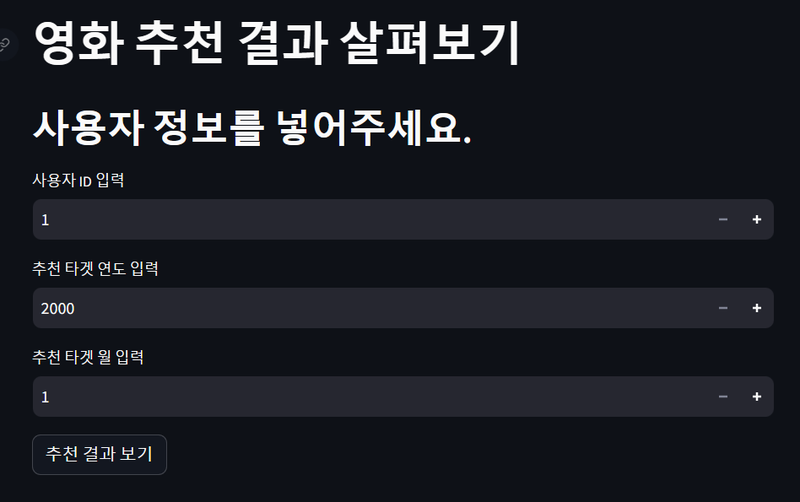

짜잔!

간단한 웹페이지가 만들어졌습니다! 👏👏👏

실행시켜 볼까요? 사용자 ID와 추천 타겟 연도와 월을 입력해 보았습니다.

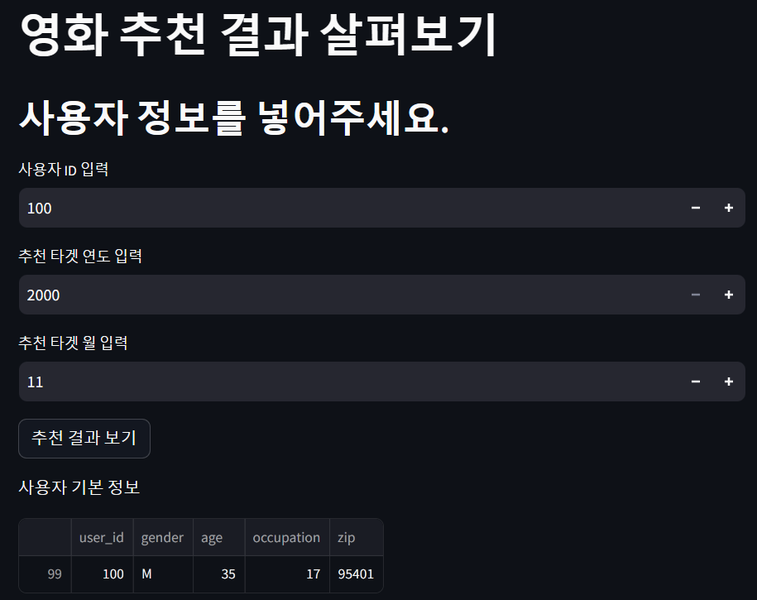

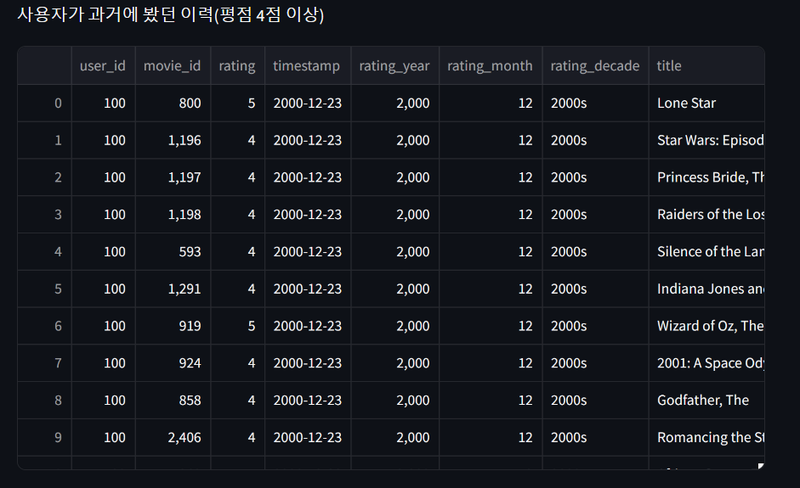

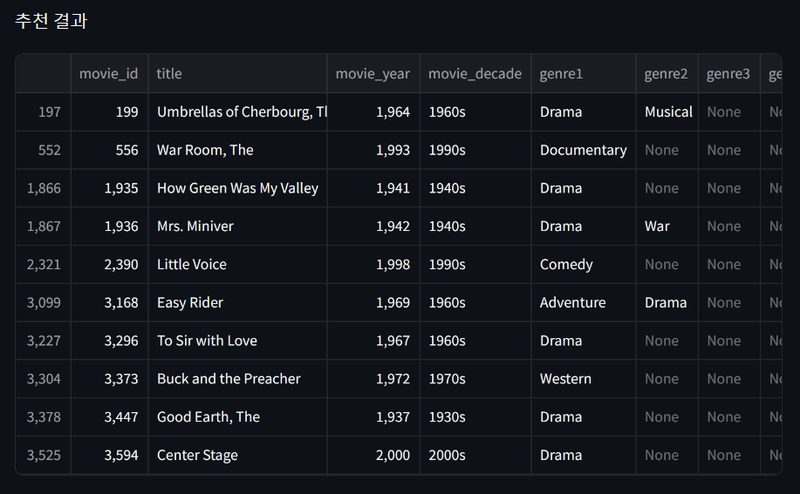

추천 결과가 사용자 기록과 연관되게 나왔나요? 다른 사용자의 결과도 살펴 보면서 확인해 보세요!

